# CLUSTERING PRACTICAL

## ARTIN

## Mathieu Lagrange

reports are to be sent to [mathieu dot lagrange at ec-nantes dot fr] no later than a week after the lab

## Import tools

please import others if needed

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

## Data: generate a synthetic dataset

Generate a set of 100 points in a 2 dimensional space split into 4 non overlapping
clusters.

In [142]:
from sklearn import datasets
cluster_centers = [(10,10),(10,20),(20,10),(20,20)]
cluster_std = [0.8, 1, 0.7, 1.1]

x,cluster_label = datasets.make_blobs(n_samples=100,n_features=2,centers=cluster_centers, cluster_std=cluster_std)


Display the set with one color per cluster using the scatter function from matplotlib.pyplot

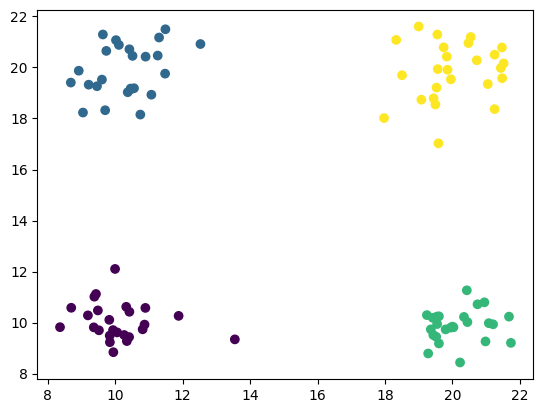

In [143]:
plt.figure()
plt.scatter(x[:,0], x[:,1], c = cluster_label)

## Baseline: the random clustering algorithm

Cluster this dataset into k clusters by assigning a random integer value between 0 and k-1 to each point.

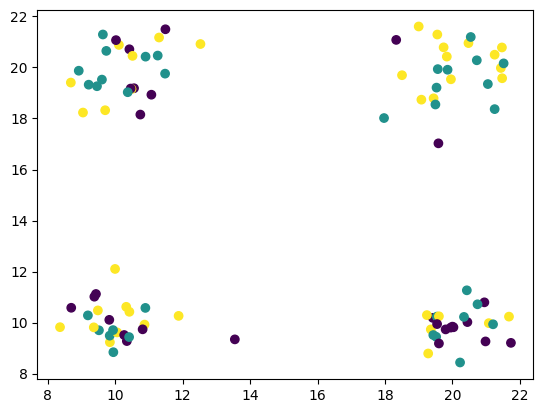

In [144]:
random_label = np.random.randint(0, 3, 100)
plt.figure()
#print(x.shape)
plt.scatter(x[:,0], x[:,1], c = random_label)


## Metric: the rand index

Implement the rand index criterion (see https://en.wikipedia.org/wiki/Rand_index for reference)

In [145]:
import itertools
predicted = random_label
ground_truth = cluster_label

def rand_index(predicted, ground_truth):  
    a = 0
    b = 0
    n = len(ground_truth)

    pairs = itertools.combinations(range(n), 2) #make all possible unique combinations of indexes from 0 to 99
    
    for pair in pairs:
        if (predicted[pair[0]] == predicted[pair[1]]) and (ground_truth[pair[0]] == ground_truth[pair[1]]):
            a += 1
        if (ground_truth[pair[0]] != ground_truth[pair[1]]) and (predicted[pair[0]] != predicted [pair[1]]):
            b += 1
            
    return  (a+b)/(n*(n-1)*.5)

ri = rand_index(predicted,ground_truth)
print(ri)


0.5921212121212122


Compute the rand index between the reference clustering and 100 runs of the baseline algorithm.

In [146]:
rand_index_list = []
i = 0


for i in range(100):
    predicted = np.random.randint(0, 3, 100)
    rand_index_list.append(rand_index(predicted, ground_truth))


    

Display results and compute the mean and standard deviation.

Mean =  0.586141414141414
Std Deviation =  0.006790583876571791


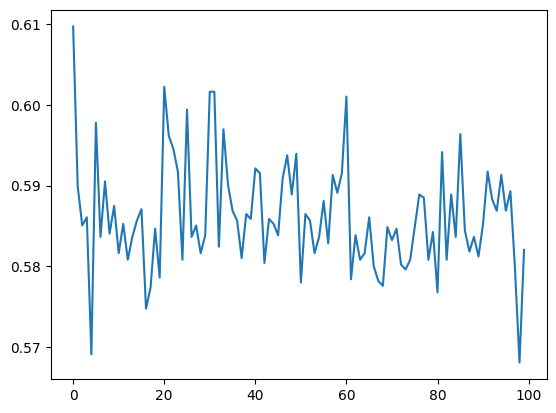

In [147]:
plt.figure()
plt.plot(range(0,len(rand_index_list)), rand_index_list)
plt.show

mean_random = sum(rand_index_list)/len(rand_index_list)
std_random = np.std(rand_index_list)

print("Mean = ", mean_random)
print("Std Deviation = ", std_random)

## Hierarchical Clustering

Compute the euclidean distance matrix using the pdist function from scipy.spatial.distance

In [148]:
from scipy.spatial.distance import pdist
euclidean_distance = pdist(x)

Display and interpret its shape

In [149]:
print(euclidean_distance.shape)

(4950,)


answer here:

The dimension of 4950 indicates that the function is returning the distance between all the distinct pairs of points of our data set.
Therefore, this function returns only an upper or lower part of the euclidean distance matrix (above or below the diagonal, where the values are 0), since the matrix is symmetric.

Compute the single link hierarchical clustering using the linkage function from scipy.cluster.hierarchy.

In [150]:
from scipy.cluster.hierarchy import linkage
slh_clust = linkage(x)

Display the corresponding dendrogram using the dendrogram function from scipy.cluster.hierarchy.

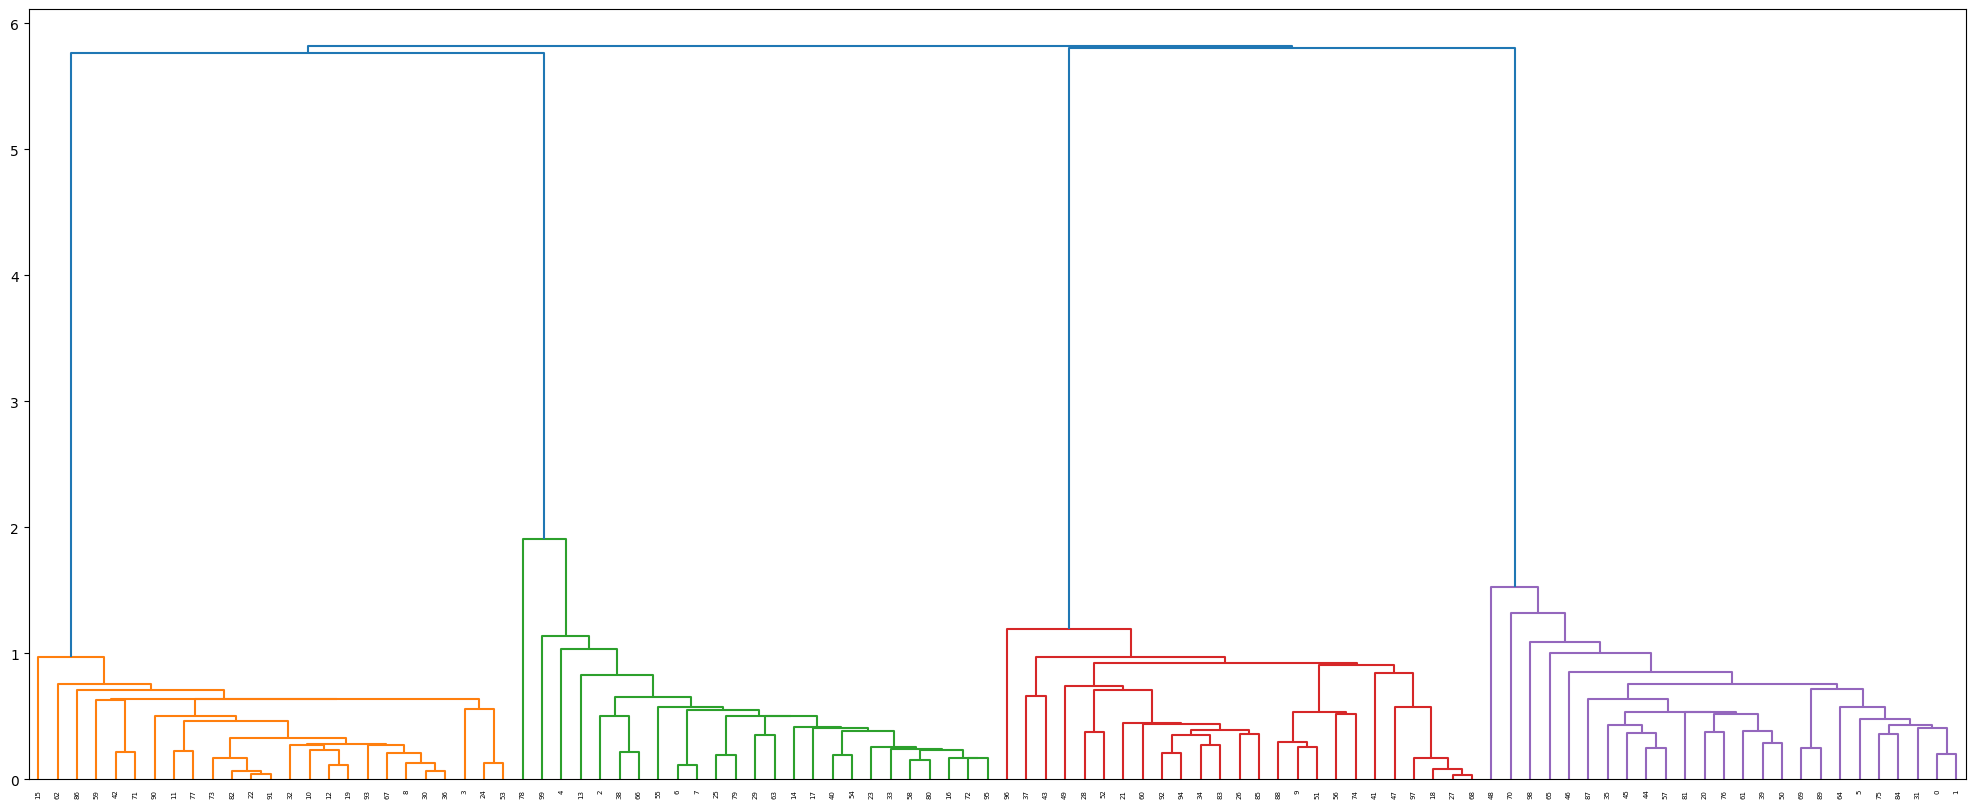

In [151]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(25,10))
dn = dendrogram(slh_clust)
plt.show()


Implement a clustering algorithm that cuts the dendrogram in order to produce k clusters using the fcluster function from scipy.cluster.hierarchy.

In [152]:
from scipy.cluster.hierarchy import fcluster
k = 4  #desired number of clusters (can use also criterion = distance and select a threshold to cut)
cut = fcluster(slh_clust, t= k, criterion='maxclust')
cut = cut -1
print(cut)



[3 3 1 0 1 3 1 1 0 2 0 0 0 1 1 0 1 1 2 0 3 2 0 1 0 1 2 2 2 1 0 3 0 1 2 3 0
 2 1 3 1 2 0 2 3 3 3 2 3 2 3 2 2 0 1 1 2 3 1 0 2 3 0 1 3 3 1 0 2 3 3 0 1 0
 2 3 3 0 1 1 1 3 0 2 3 2 0 3 2 3 0 0 2 0 2 1 2 2 3 1]


Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [153]:
rand_index_list = []
iterations = []

for i in range(100):
    
    slh = linkage(x)                                            #Single link Hierarchical Clustering
    f_cluster = fcluster(slh, t = 4, criterion = 'maxclust')    #divide in 4 clusters
    f_cluster = f_cluster - 1                                   #subtract one from all predicted labels so it matches the ground truth indexes of the clusters
    
    rand_index_list.append(rand_index(f_cluster, ground_truth)) 
    iterations.append(i)



Display results and compute the mean and standard deviation.

In [154]:
print(rand_index_list)
mean_hierarchical = np.mean(rand_index_list)
std_hierarchical = np.std(rand_index_list)

print("Mean = ", mean_hierarchical)
print("Std = ", std_hierarchical)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean =  1.0
Std =  0.0


Explain why the standard deviation is 0.

answer here

The standard deviation is 0 because we are clustering the data using a metric of distance. There is no randomness, therefore there is no variation, the result is always the same.

## Partitional Clustering

Implement the k-means algorithm (see https://en.wikipedia.org/wiki/K-means_clustering section Standard algorithm for reference).

Hint: please consider the cdist function from scipy.spatial.distance to compute the distance of the points to the centroids.

In [196]:
from scipy.spatial.distance import cdist
#max_iter = 1000


def kmeans(dataset, k):
    #1) randomly define 4 centroids
    #2) Measure the distance between each point and each centroid
    #3) Assign each point to the nearest cluster
    #=============================================================
    #4) Calculate the mean of each cluster as a new centroid
    #5) evaluate error (stop condition)

    #centroids = np.random.randint(30, size = (k,2))     #generate four random centroids (not suitable for 4D case)
    
    centroids = dataset[np.random.choice(len(dataset),size=k,replace=False)]      #centroids = random datapoints (good for multidimensional cases)
    prev_predicted_labels = np.zeros(len(dataset))
    predicted_labels = np.zeros(len(dataset))
    
    while(True):
        distances = cdist(dataset, centroids,metric='sqeuclidean')                  #calculate the distance between each point and each centroid

        #cluster (assign point to the nearest centroid)
        predicted_labels = np.argmin(distances,axis=1)                              #(axis 1 = columns, axis 0 = rows)

        for i in range(k):                                                          #calculate new centroids
            if len(dataset[predicted_labels == i]) == 0:                            #if a cluster is empty, assign a random point to that cluster
                centroids[i] = dataset[np.random.choice(len(dataset), size=1)]
                continue
            centroids[i] = np.mean(dataset[predicted_labels == i], axis = 0)        #centroids = mean of all the points in that cluster
                # centroids[i] = np.mean(cluster, axis = 0)
                


        if np.sum(np.abs(predicted_labels - prev_predicted_labels)) == 0:            #check if clustering has changed
            break

        prev_predicted_labels = predicted_labels

    return predicted_labels.tolist()

kmean_labels= kmeans(x,4)


Compute the rand index between the reference clustering and 100 runs of this clustering algorithm.

In [156]:
rand_index_list = []
iterations = []

for i in range(100):
    
    kmean_labels, centroids = kmeans(x,4)

    rand_index_list.append(rand_index(kmean_labels, ground_truth)) 
    iterations.append(i)

Display results and compute the mean and standard deviation.

In [157]:
print(rand_index_list)
mean_partitional = np.mean(rand_index_list)
std_partitional = np.std(rand_index_list)

print("Mean = ", mean_partitional)
print("Std = ", std_partitional)

[1.0, 0.8462626262626263, 0.8434343434343434, 0.8535353535353535, 1.0, 1.0, 1.0, 0.8422222222222222, 1.0, 0.8119191919191919, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8426262626262626, 1.0, 1.0, 1.0, 0.8397979797979798, 0.8406060606060606, 0.8462626262626263, 0.8422222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8482828282828283, 1.0, 1.0, 1.0, 0.8644444444444445, 0.8416161616161616, 1.0, 0.8397979797979798, 1.0, 0.8434343434343434, 1.0, 1.0, 0.8422222222222222, 0.8462626262626263, 0.8406060606060606, 1.0, 1.0, 0.8406060606060606, 0.8422222222222222, 1.0, 1.0, 0.8385858585858585, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.84, 1.0, 0.8422222222222222, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8147474747474748, 1.0, 0.8422222222222222, 1.0, 0.8434343434343434, 1.0, 1.0, 0.8434343434343434, 1.0, 1.0, 0.8422222222222222, 1.0, 1.0, 0.832929292929293, 1.0, 0.8462626262626263, 0.8446464646464646, 1.0, 1.0, 0.8462626262626263, 1.0, 0.8422222222222222, 1.0, 1.0, 0.8434343434343434, 1.0, 1.0, 1.0, 1.0]
Mean

## Performance Analysis

Display the performance of the 3 clustering algorithms on the synthetic dataset using the bar function from matplotlib.pyplot.

Random Clustering
Rand index Mean:  0.586141414141414
Rand index Standard Deviation:  0.006790583876571791
 
Partitional Clustering
Rand index Mean:  0.9462101010101012
Rand index Standard Deviation:  0.07511297273843404
 
Hierarchical Clustering
Rand index Mean:  1.0
Rand index Standard Deviation:  0.0
 


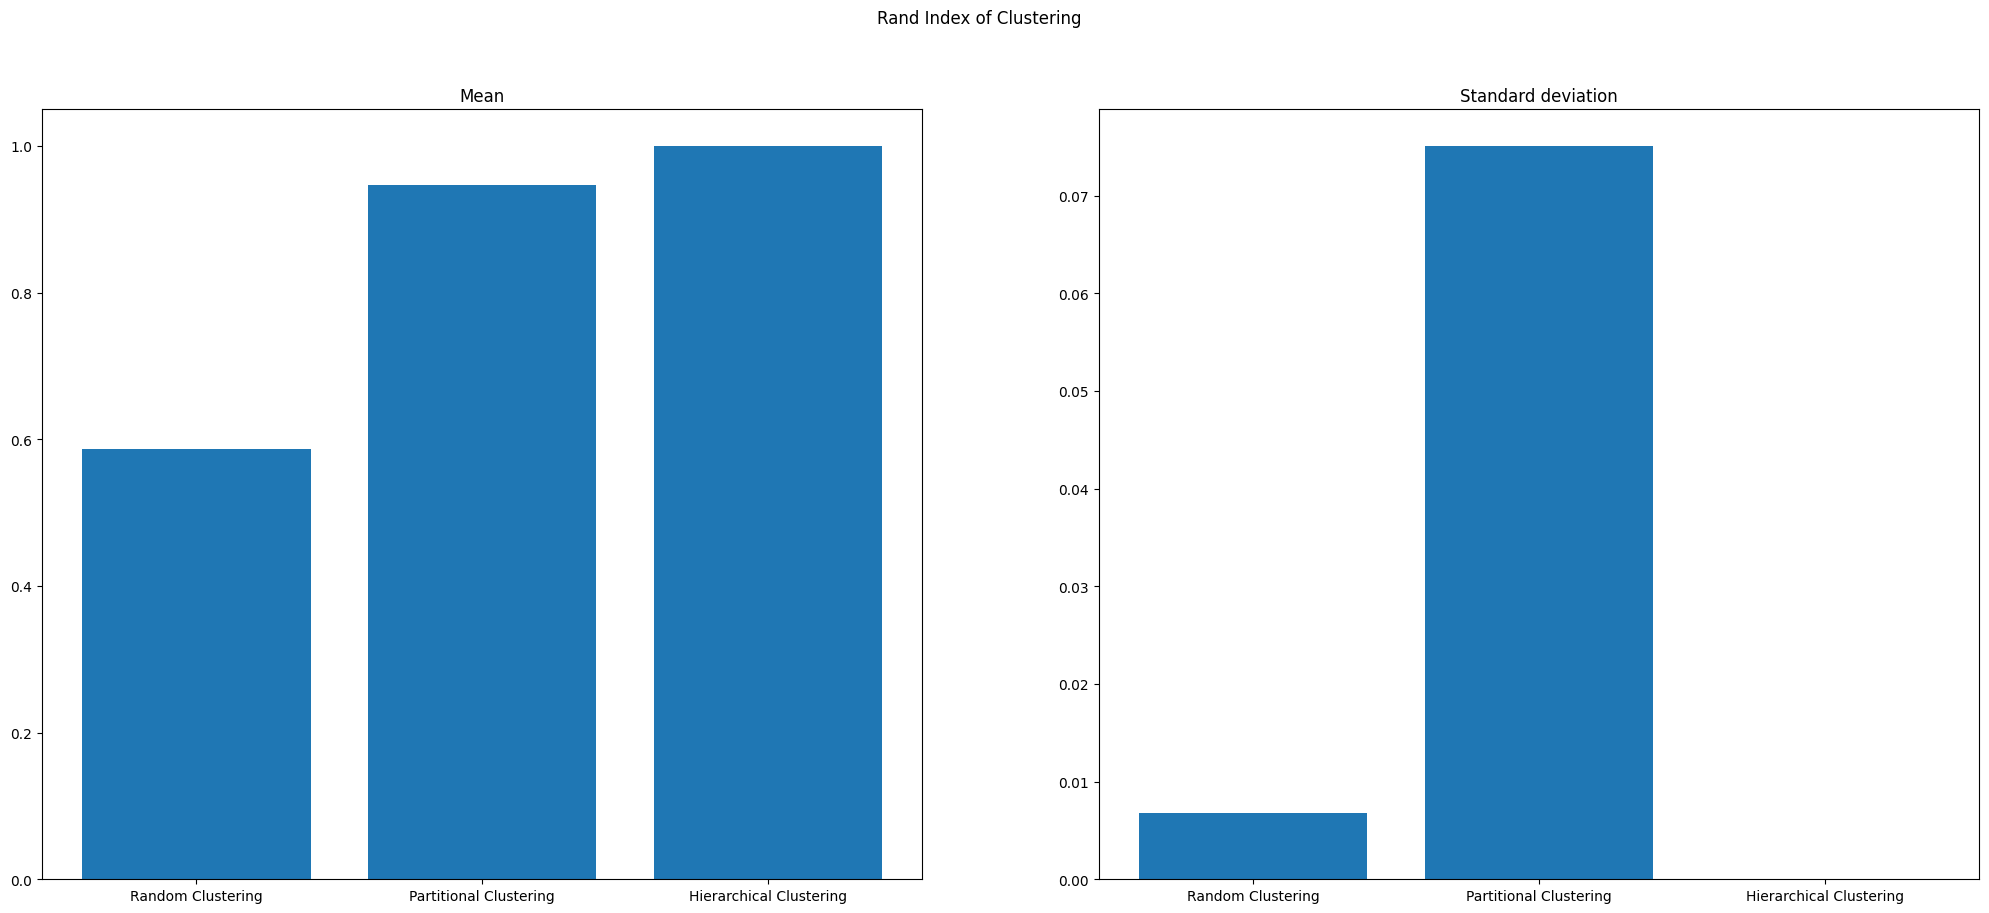

In [158]:
names = ["Random Clustering","Partitional Clustering","Hierarchical Clustering"]
means = [mean_random,mean_partitional, mean_hierarchical]
std_devs = [std_random, std_partitional, std_hierarchical]

for i in range(len(names)):
    print(names[i])
    print("Rand index Mean: ", means[i])
    print("Rand index Standard Deviation: ", std_devs[i])
    print(" ")
    
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.bar(names, means)
plt.title("Mean")

plt.subplot(122)
plt.bar(names, std_devs)
plt.title("Standard deviation")

plt.suptitle("Rand Index of Clustering")
plt.show()


Load the iris dataset using the load_iris function from scikit-learn and perform the same performance analysis using this dataset.

Random Clustering
Rand index Mean:  0.5570357941834452
Rand index Standard Deviation:  0.0022418016235085953
 
Hierarchical Clustering
Rand index Mean:  0.7766442953020134
Rand index Standard Deviation:  0.0
 
Partitional Clustering
Rand index Mean:  0.8567337807606263
Rand index Standard Deviation:  0.051856302101524775
 


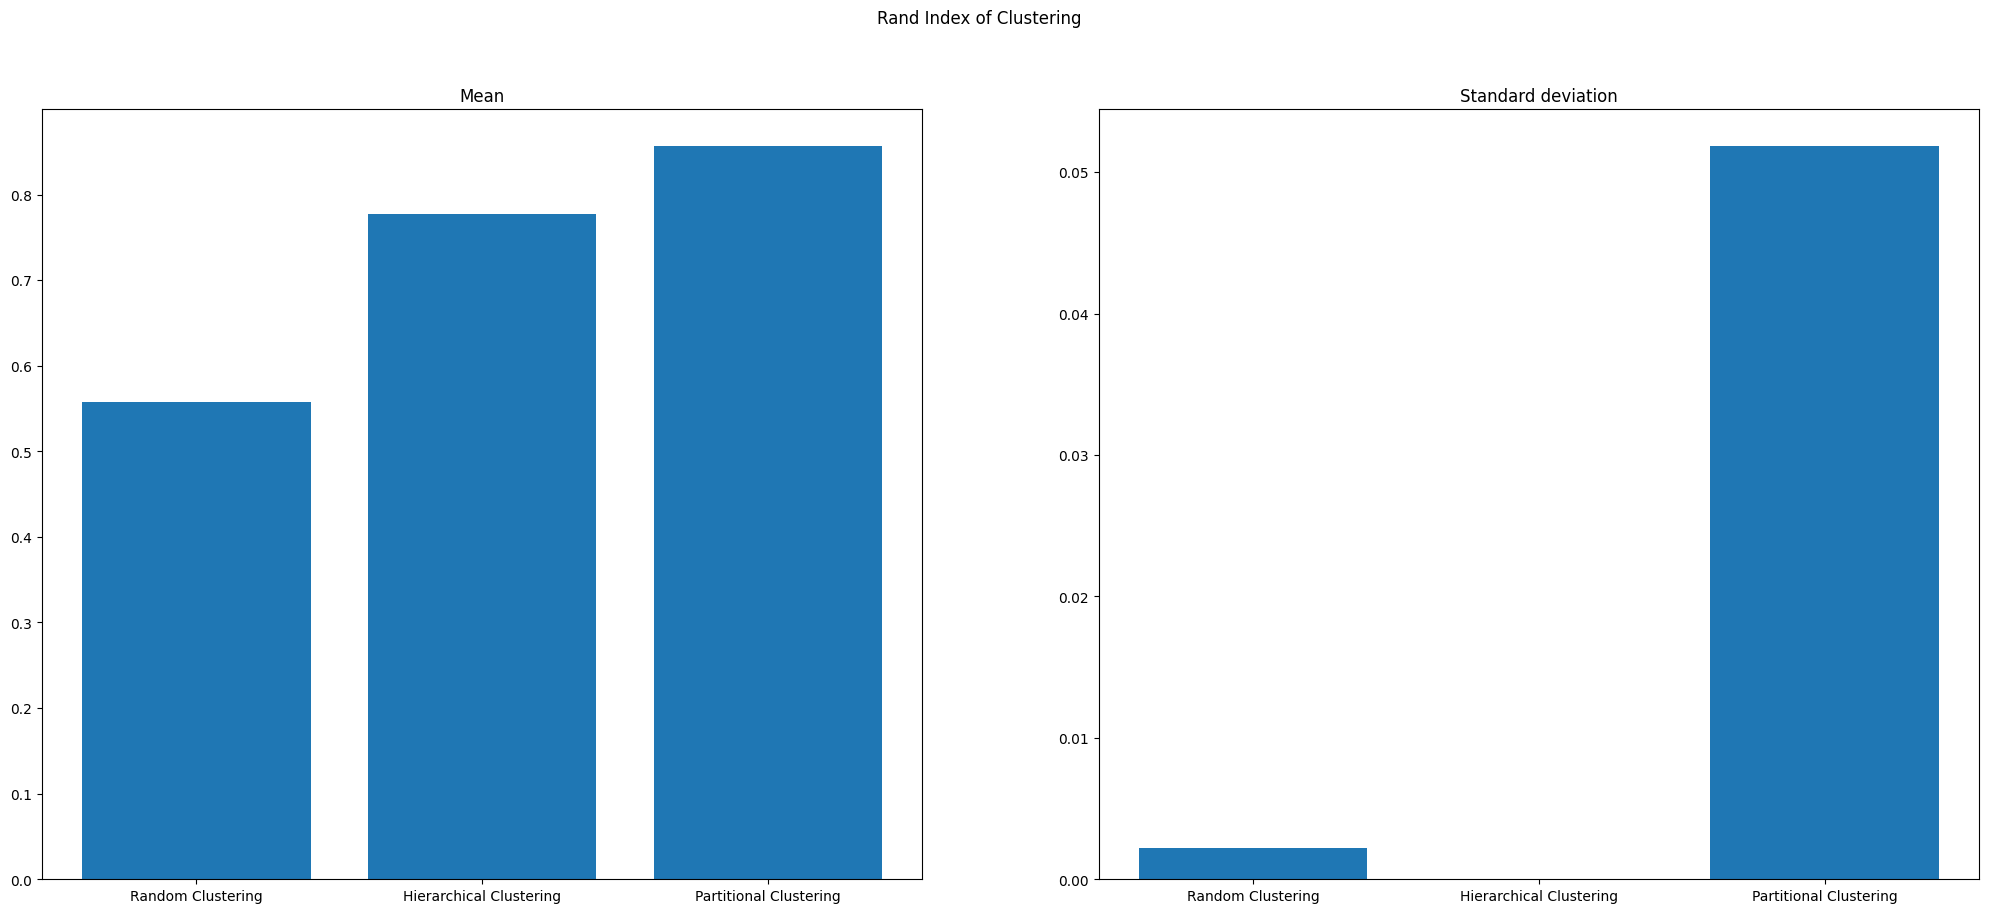

0.719731543624161


In [208]:
from sklearn.datasets import load_iris

dataset = load_iris()

points = dataset.data
ground_truth = dataset.target
labels = dataset.target_names

rand_indexes = [[] for i in range(3)]

for i in range(len(dataset)):
    
    #random clusterting:
    random_labels = np.random.randint(0, len(labels), len(points))
    ri_random = rand_index(random_labels, ground_truth)
    rand_indexes[0].append(ri_random)

    #Hierarchical Clustering
    slh = linkage(points)
    f_cluster = fcluster(slh, t = len(labels), criterion = 'maxclust')
    ri_hierarchical = rand_index(f_cluster, ground_truth)
    rand_indexes[1].append(ri_hierarchical)

    #K-Means
    k_means_clust= kmeans(points,len(labels))
    ri_kmeans = rand_index(k_means_clust, ground_truth)
    rand_indexes[2].append(ri_kmeans)

names = ["Random Clustering","Hierarchical Clustering","Partitional Clustering"]
means = [np.mean(rand_indexes[0]),np.mean(rand_indexes[1]), np.mean(rand_indexes[2])]
std_devs = [np.std(rand_indexes[0]),np.std(rand_indexes[1]), np.std(rand_indexes[2])]

for i in range(len(names)):
    print(names[i])
    print("Rand index Mean: ", means[i])
    print("Rand index Standard Deviation: ", std_devs[i])
    print(" ")




#PLOTTING
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.bar(names, means)
plt.title("Mean")

plt.subplot(122)
plt.bar(names, std_devs)
plt.title("Standard deviation")

plt.suptitle("Rand Index of Clustering")
plt.show()


Load the Breast cancer wisconsin (diagnostic) dataset dataset using the load_breast_cancer function from scikit-learn and perform the same performance analysis using this dataset.

Random Clustering
Rand index Mean:  0.5000881828758137
Rand index Standard Deviation:  0.0010124859756348407
 
Hierarchical Clustering
Rand index Mean:  0.5325503106512537
Rand index Standard Deviation:  0.0
 
Partitional Clustering
Rand index Mean:  0.7503774845912028
Rand index Standard Deviation:  0.0
 


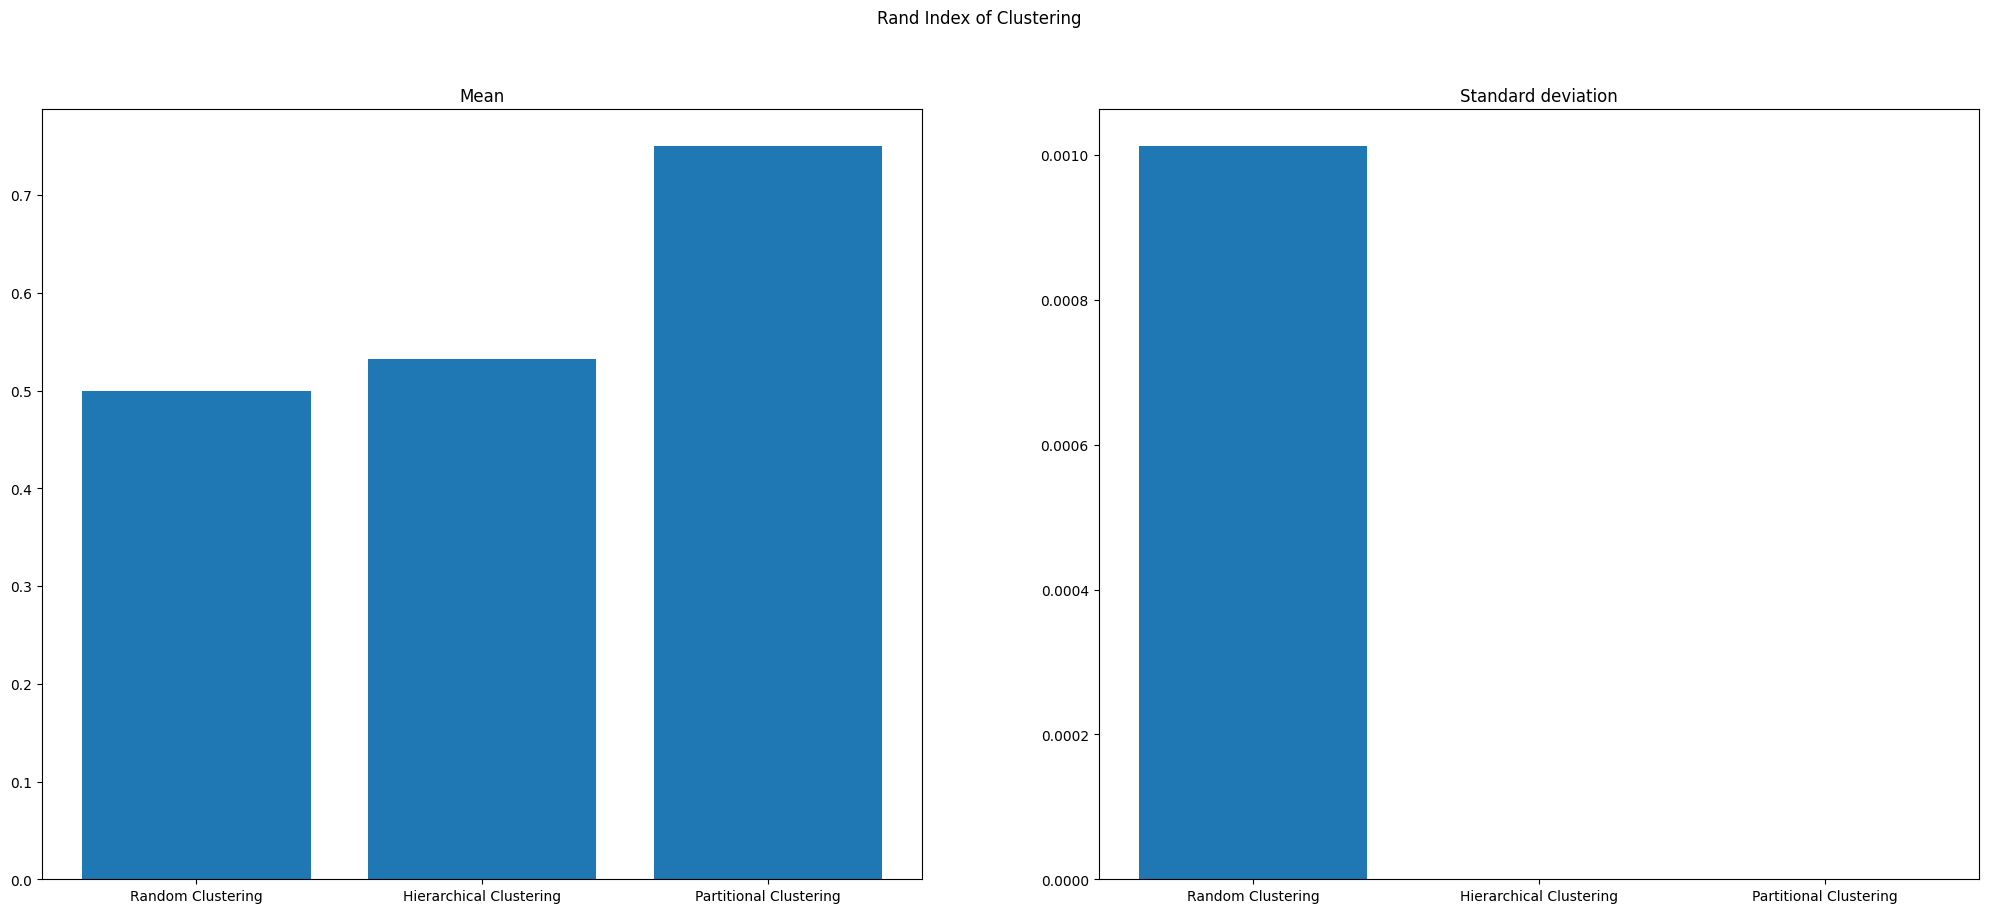

In [209]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

points = dataset.data
ground_truth = dataset.target
labels = dataset.target_names

rand_indexes = [[] for i in range(3)]

for i in range(len(dataset)):
    
    #random clusterting:
    random_labels = np.random.randint(0, len(labels), len(points))
    ri_random = rand_index(random_labels, ground_truth)
    rand_indexes[0].append(ri_random)

    #Hierarchical Clustering
    slh = linkage(points)
    f_cluster = fcluster(slh, t = len(labels), criterion = 'maxclust')
    ri_hierarchical = rand_index(f_cluster, ground_truth)
    rand_indexes[1].append(ri_hierarchical)

    #K-Means
    k_means_clust= kmeans(points,len(labels))
    ri_kmeans = rand_index(k_means_clust, ground_truth)
    rand_indexes[2].append(ri_kmeans)

names = ["Random Clustering","Hierarchical Clustering","Partitional Clustering"]
means = [np.mean(rand_indexes[0]),np.mean(rand_indexes[1]), np.mean(rand_indexes[2])]
std_devs = [np.std(rand_indexes[0]),np.std(rand_indexes[1]), np.std(rand_indexes[2])]

for i in range(len(names)):
    print(names[i])
    print("Rand index Mean: ", means[i])
    print("Rand index Standard Deviation: ", std_devs[i])
    print(" ")



#PLOTTING
plt.figure(figsize=(25,10))

plt.subplot(121)
plt.bar(names, means)
plt.title("Mean")

plt.subplot(122)
plt.bar(names, std_devs)
plt.title("Standard deviation")

plt.suptitle("Rand Index of Clustering")
plt.show()


## [Bonus] Determining the number of clusters

Implement the gap statistic method for determining the optimal number of clusters for the 3 datasets.


Discuss the results.

answer here.